# Applied Machine Learning Assignment 1 - EDA
## Titanic Dataset Survivor Prediction - Mohsin Ali Mirza (20k-0353)

#### https://www.kaggle.com/competitions/playground-series-s3e22/data?select=train.csv

In [565]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno

pd.pandas.set_option('display.max_columns',None)



## Data Summarization

In [566]:
df = pd.read_csv("train.csv")
df = df.drop(columns="Name")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [567]:
# List of numerical variables
numerical_features = df.select_dtypes(include=['int64','float64'])

# List of categorical variables
categorical_features = df.select_dtypes(include=[object])

print('Number of numerical variables: ', len(numerical_features))
print('Number of categorical variables: ', len(categorical_features))

print("\nNumerical Features:\n",numerical_features.columns)
print("\nCategorical Features:\n",categorical_features.columns)
print("\n\nData Dimensions:")
print("Total Rows:",df.shape[0])
print("Total Cols:",df.shape[1])

Number of numerical variables:  891
Number of categorical variables:  891

Numerical Features:
 Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Categorical Features:
 Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


Data Dimensions:
Total Rows: 891
Total Cols: 11


In [568]:
#This exclude NaN values.
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [569]:
df.nunique(axis=0)

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [570]:
#Shows the count of non_null values + their type(int,float,object) Object->Categorical
print("Data Dimensions:")
print("Total Rows:",df.shape[0])
print("Total Cols:",df.shape[1])

print("\n\nData Details:")
df.info(memory_usage=False)

Data Dimensions:
Total Rows: 891
Total Cols: 11


Data Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)

In [571]:
#Checking if there are any null values or not
features_with_na = df.isnull().sum()
features_with_na

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

This gives us some insight about the general description of the dataset.

#Data Visualization

## Numerical Data

In [572]:
#Numerical Features Visualization
numerical_features.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Text(0.5, 0.98, 'Histograms & Density Plots For Numerical Data')

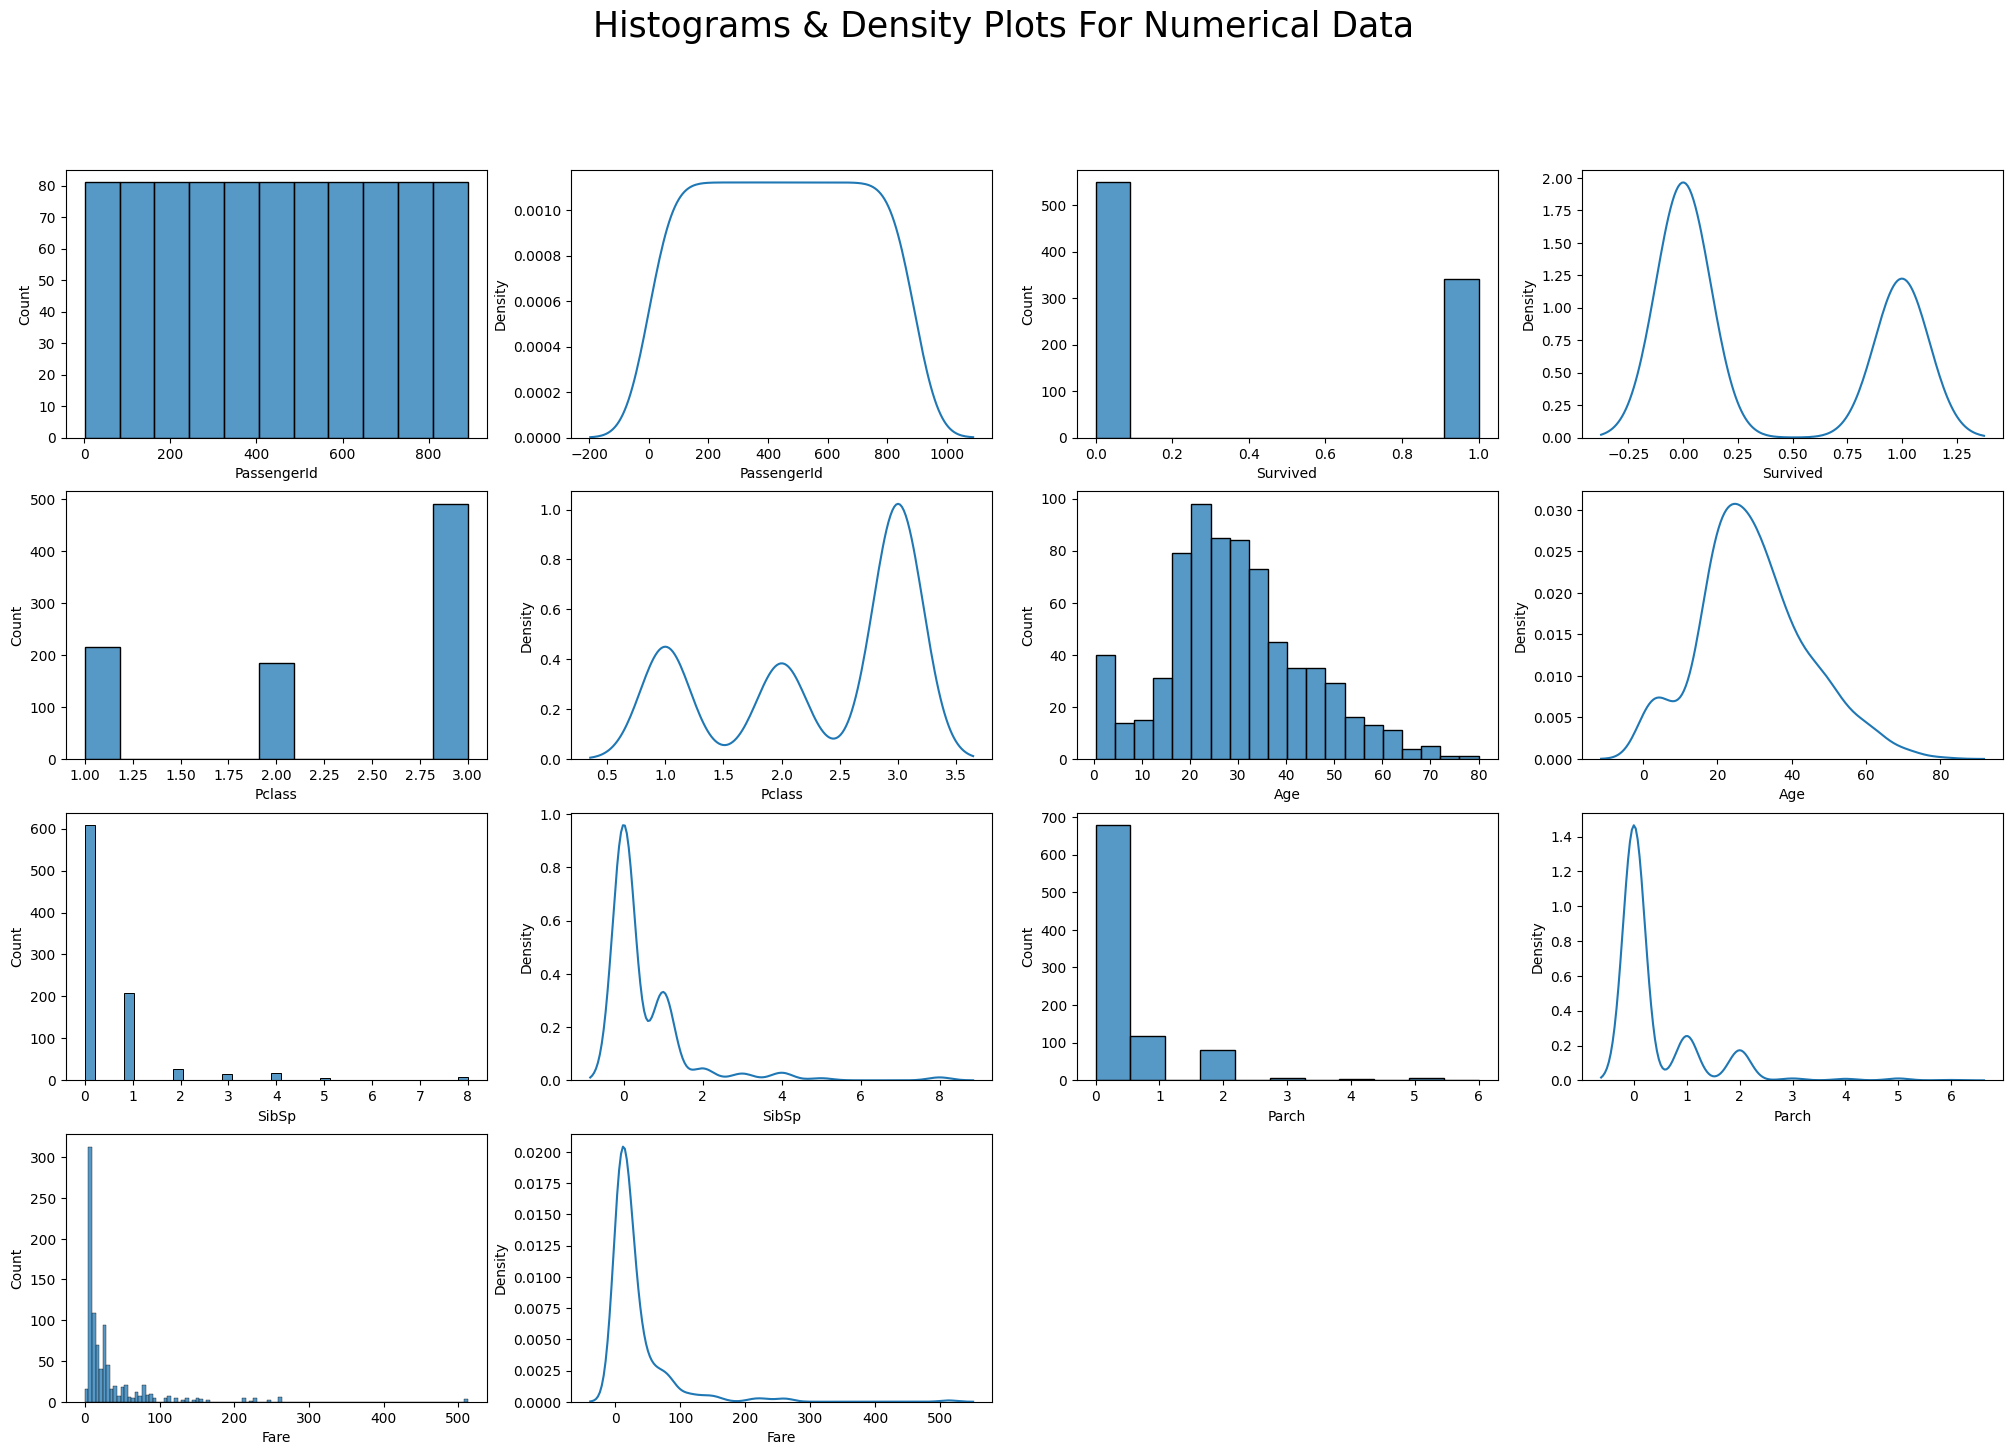

In [573]:
#plt.subplots(rows,cols, Total figsize)
fig, axes = plt.subplots(4, 4,figsize=(25,16))

fig.delaxes(axes[3,2])
fig.delaxes(axes[3,3])

sns.histplot(numerical_features['PassengerId'],ax=axes[0,0])
sns.kdeplot(numerical_features['PassengerId'],ax=axes[0,1])

sns.histplot(numerical_features['Survived'],ax=axes[0,2])
sns.kdeplot(numerical_features['Survived'],ax=axes[0,3])

sns.histplot(numerical_features['Pclass'],ax=axes[1,0])
sns.kdeplot(numerical_features['Pclass'],ax=axes[1,1])

sns.histplot(numerical_features['Age'],ax=axes[1,2])
sns.kdeplot(numerical_features['Age'],ax=axes[1,3])

sns.histplot(numerical_features['SibSp'],ax=axes[2,0])
sns.kdeplot(numerical_features['SibSp'],ax=axes[2,1])

sns.histplot(numerical_features['Parch'],ax=axes[2,2])
sns.kdeplot(numerical_features['Parch'],ax=axes[2,3])

sns.histplot(numerical_features['Fare'],ax=axes[3,0])
sns.kdeplot(numerical_features['Fare'],ax=axes[3,1])

plt.suptitle('Histograms & Density Plots For Numerical Data', fontsize=25)


<Axes: xlabel='Fare'>

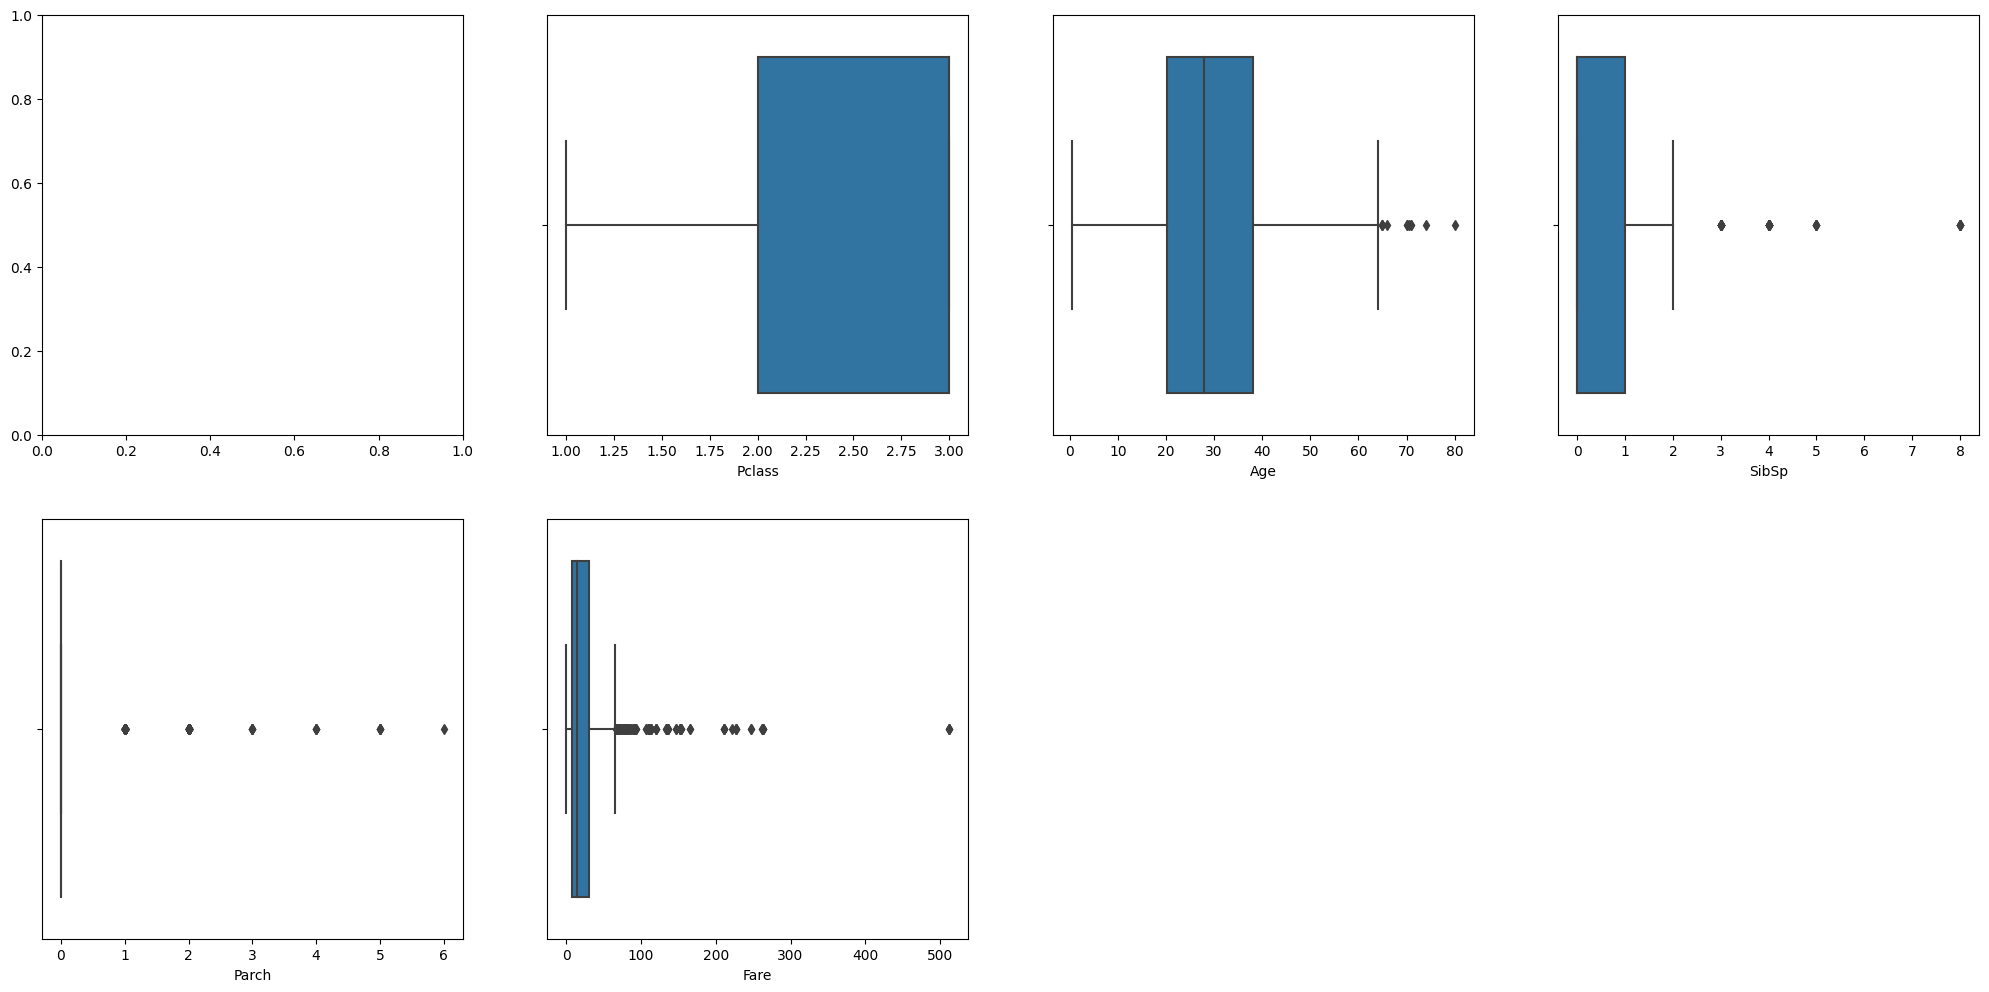

In [574]:
fig, axes = plt.subplots(2,4,figsize=(25,12))
fig.delaxes(axes[1,2])
fig.delaxes(axes[1,3])


sns.boxplot( data=numerical_features , x='Pclass', ax=axes[0,1])
sns.boxplot( data=numerical_features , x='Age', ax=axes[0,2])
sns.boxplot( data=numerical_features , x='SibSp', ax=axes[0,3])
sns.boxplot( data=numerical_features , x='Parch', ax=axes[1,0])
sns.boxplot( data=numerical_features , x='Fare', ax=axes[1,1])

SibSp, Fare, Parch is mostly left skewed
PassengerID is uniformly Distributed

Deductions:
*   SibSp: Number of Siblings are less
*   Parch: Number of Children with Parents are less
*   Fare: Less Fare, outliers detected in fare
*   Age: More Number of people of age 30's
*   Survived: More people were able to survive
*   PClass: More number of 3rd Class Passengers




## Categorical Data

In [575]:
categorical_features.columns

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

Text(0.5, 0.98, 'Bar Plots')

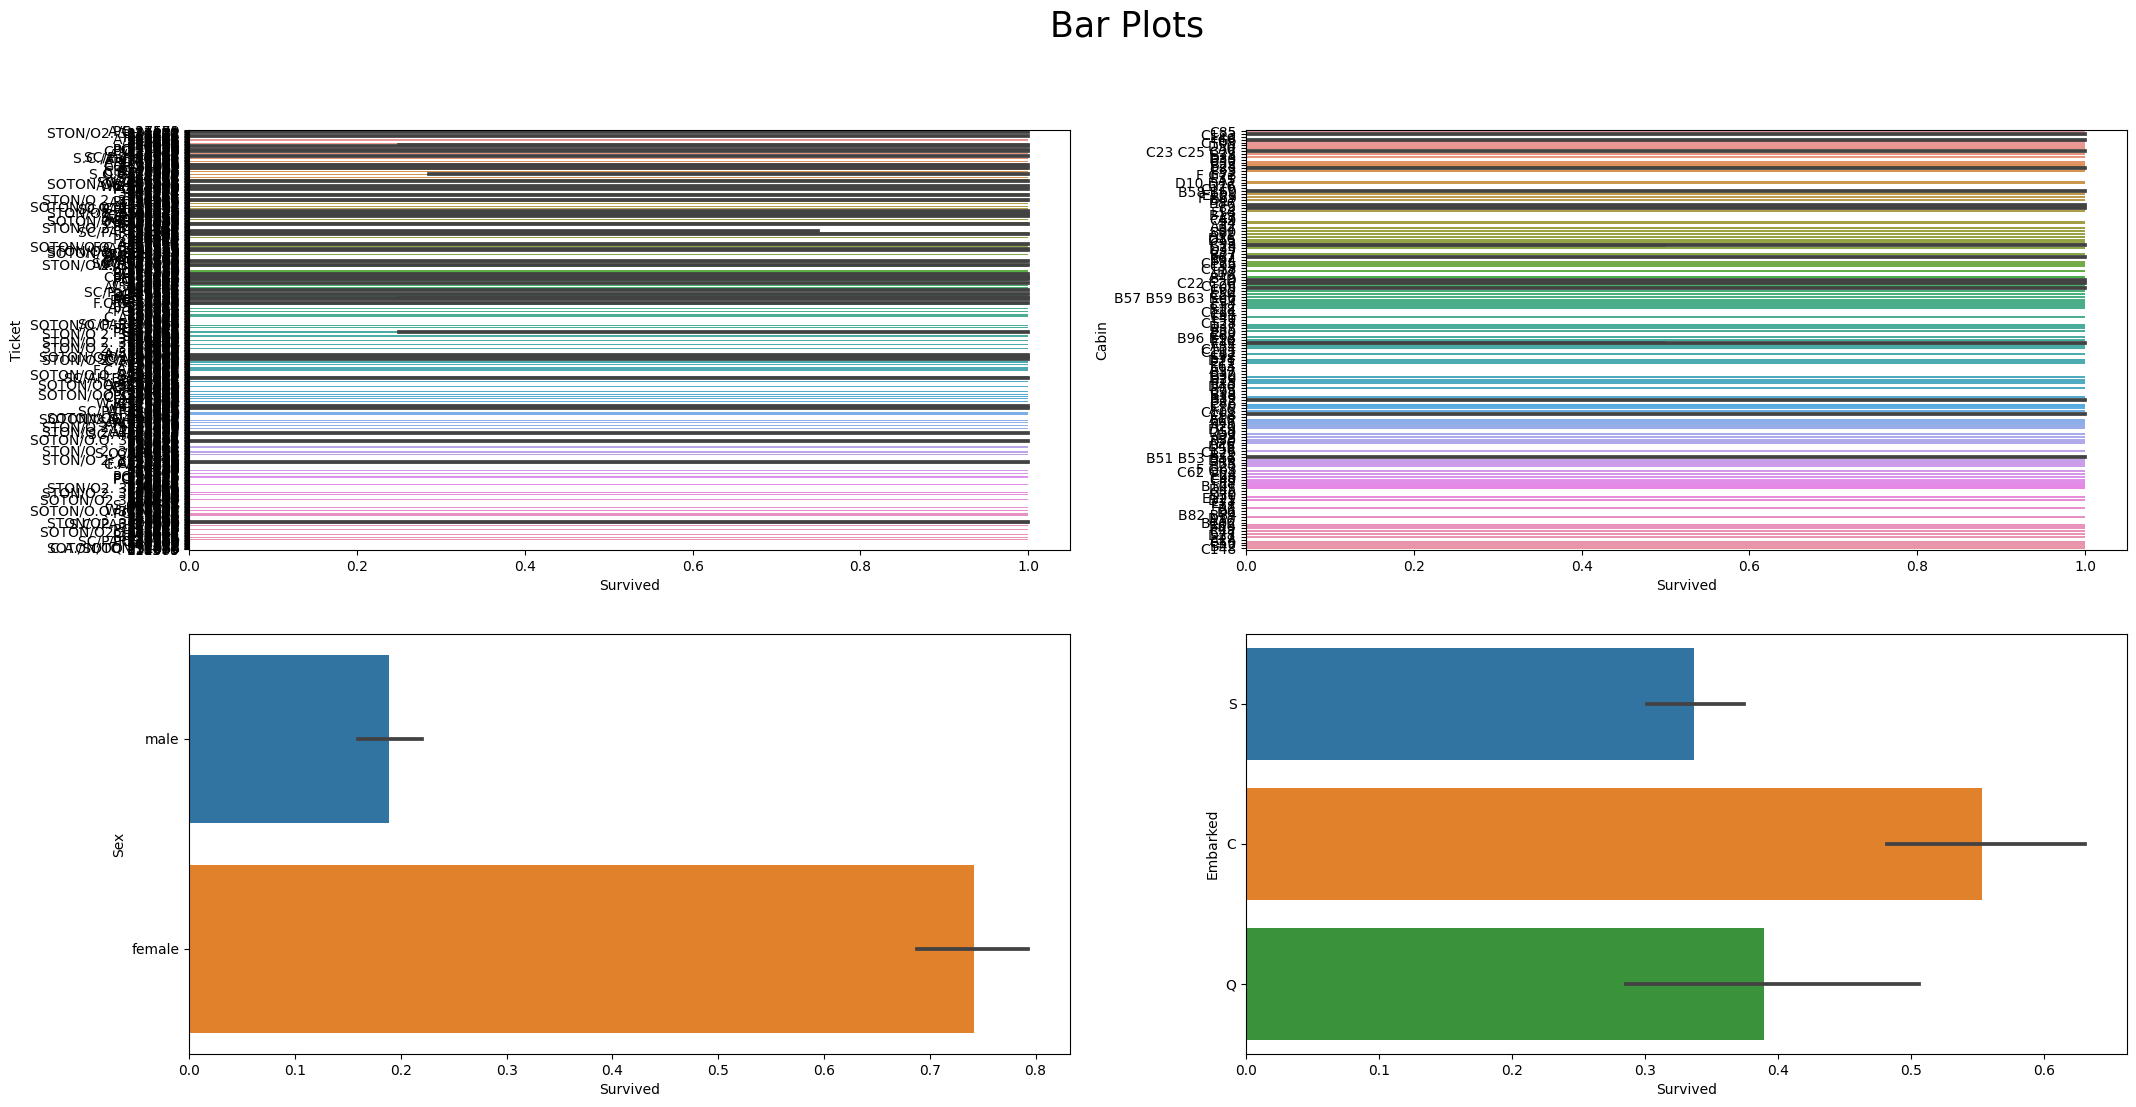

In [576]:
fig, axes = plt.subplots(2, 2, figsize=(25, 12))
sns.barplot(data=df, x='Survived',y='Ticket',ax=axes[0,0])
sns.barplot(data=df, x='Survived',y='Cabin',ax=axes[0,1])
sns.barplot(data=df, x='Survived',y='Sex',ax=axes[1,0])
sns.barplot(data=df, x='Survived',y='Embarked',ax=axes[1,1])


plt.suptitle("Bar Plots",fontsize=25)


# df['Sex'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=axes[1,0], ylabel='')
# df['Embarked'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=axes[1,1],ylabel='')
# plt.suptitle('Bar Plots/Pie Charts of all categorical features', fontsize=25)

Text(0.5, 0.98, 'Count/Hist Plots & PieCharts For Categorical Data')

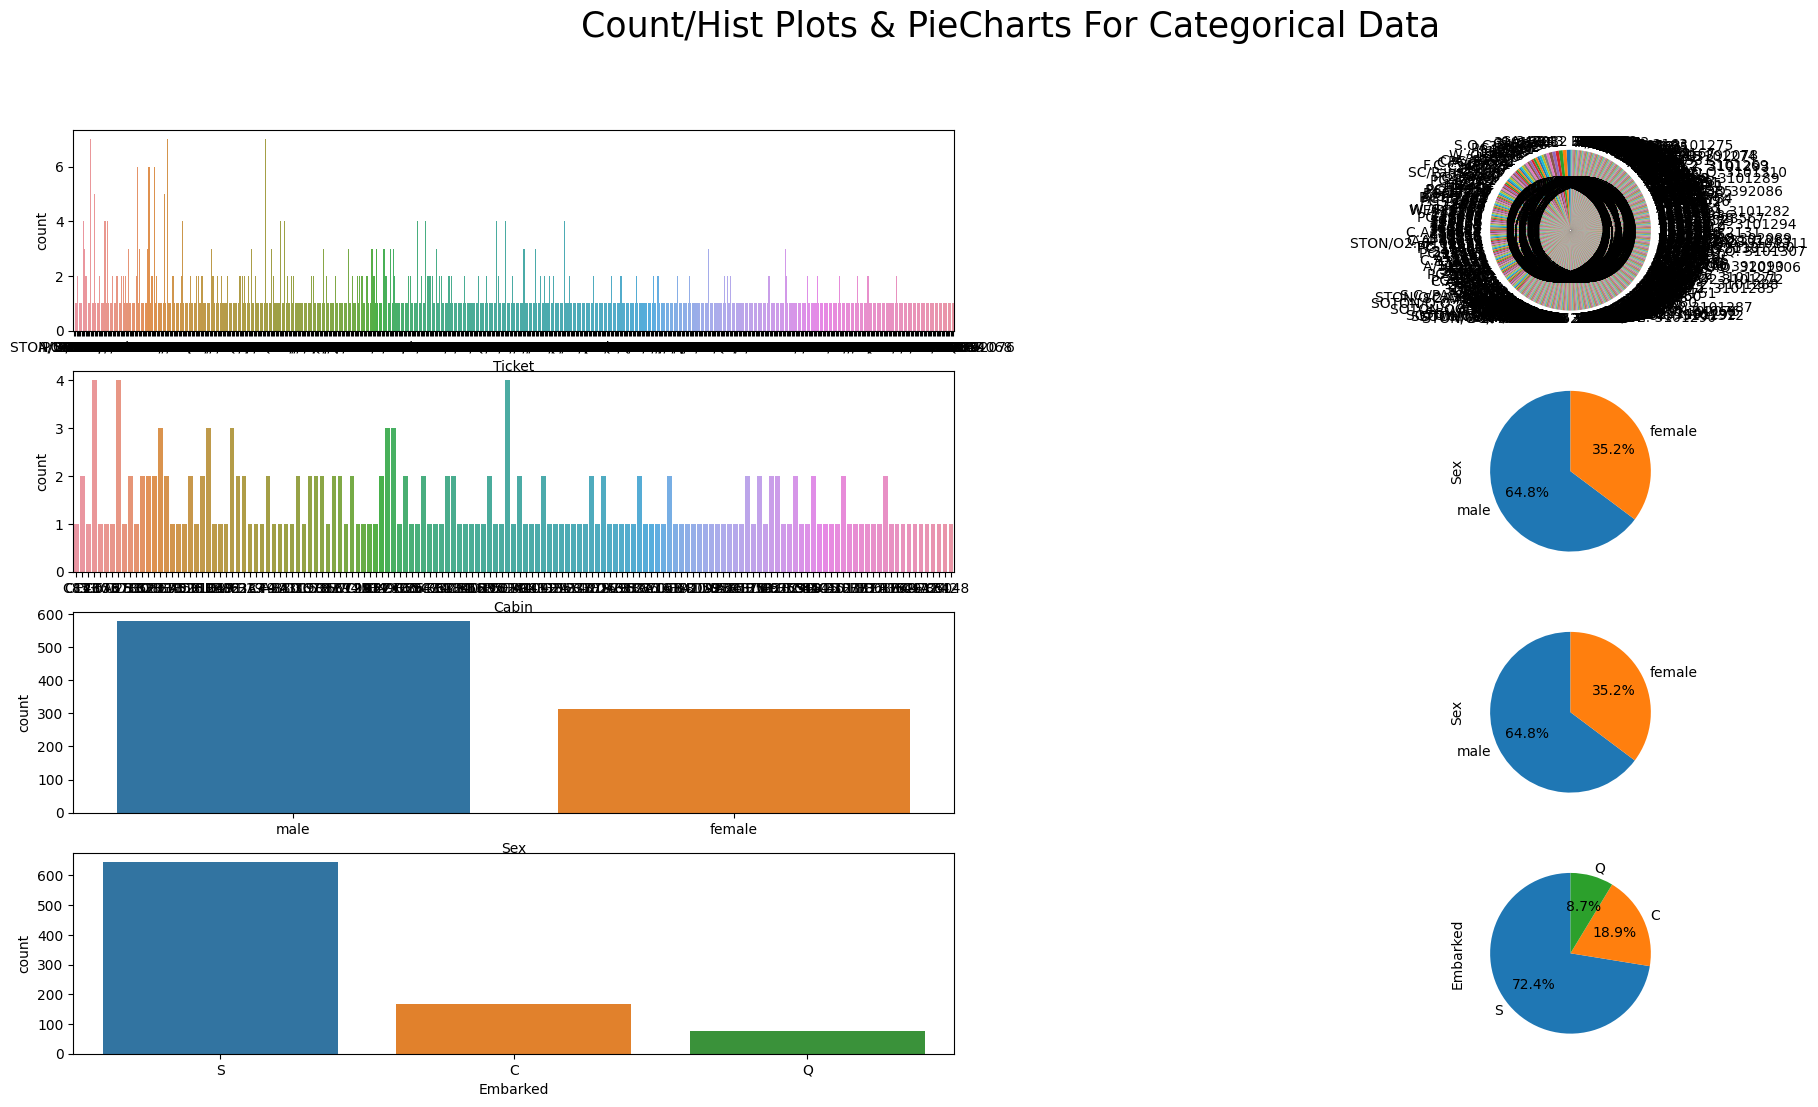

In [577]:
fig, axes = plt.subplots(4,2,figsize=(25, 12))

sns.countplot(data=df, x='Ticket',ax=axes[0,0])
categorical_features['Ticket'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%',ax=axes[0,1])

sns.countplot(data=df, x='Cabin',ax=axes[1,0])
categorical_features['Sex'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=axes[1,1])

sns.countplot(data=df, x='Sex',ax=axes[2,0])
categorical_features['Sex'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=axes[2,1])

sns.countplot(data=df, x='Embarked',ax=axes[3,0])
categorical_features['Embarked'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=axes[3,1])


plt.suptitle("Count/Hist Plots & PieCharts For Categorical Data",fontsize=25)

There are more males than females, however more females were able to survive<br>

<br>Embark — Southampton, Cherbourg, and Queenstown.<br>
More people embarked from Southampton, however the most people who survived were from Cherbourg

<br>Too many labels for Ticket and Cabin<br>

# Managing Missing Values

In [578]:
print(np.where(df['Age'].isnull()))

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
        48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
       126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
       196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
       270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
       334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
       409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
       459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
       511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
       564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
       613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
       692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
       773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
       839, 846, 849, 859, 863, 868, 878, 888]),)


<Axes: >

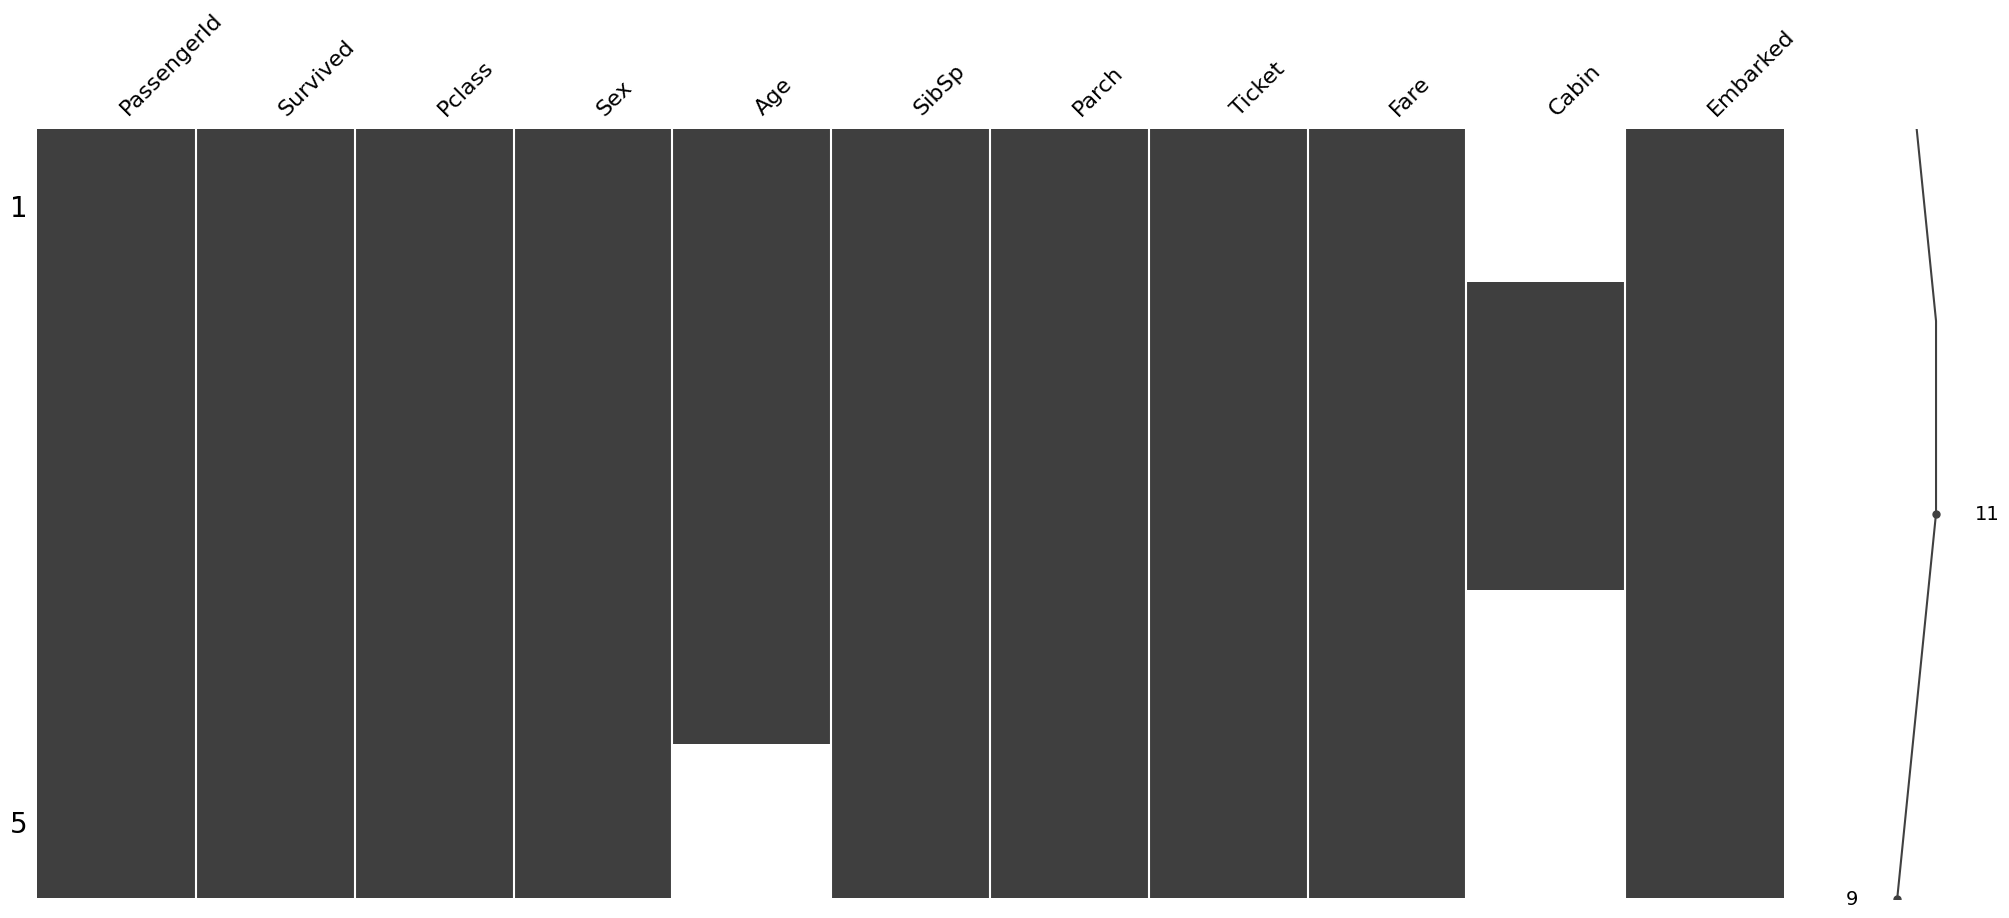

In [579]:
msno.matrix(df.sample(5))

<Axes: >

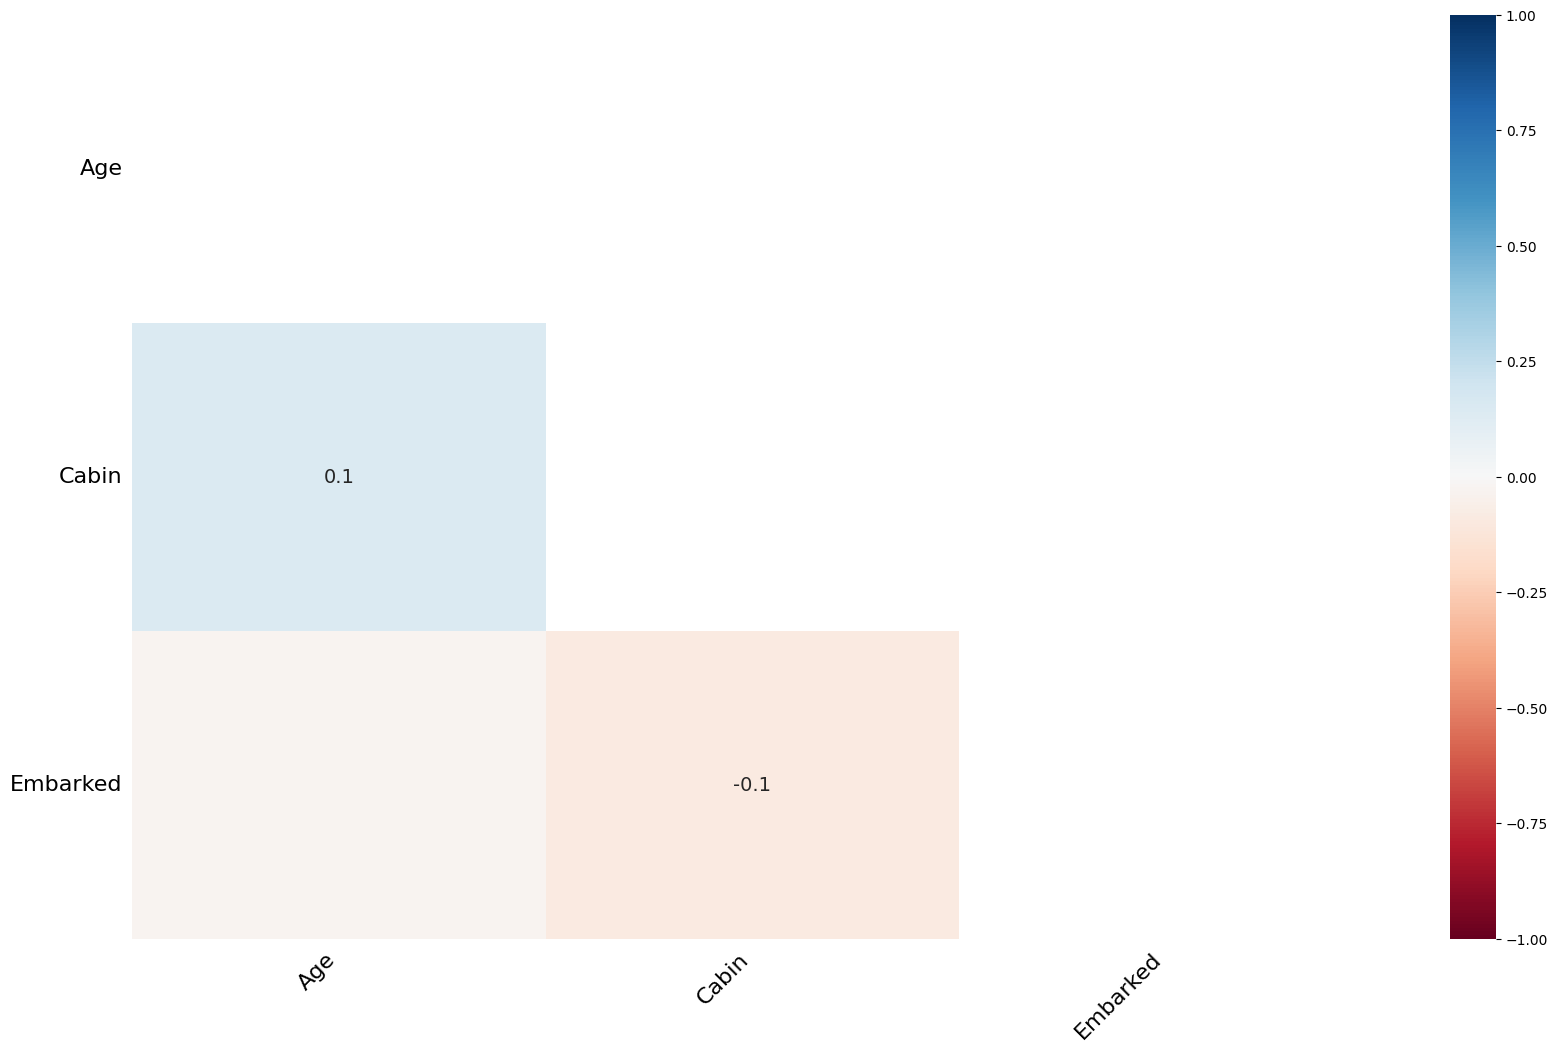

In [580]:
msno.heatmap(df)

In [581]:
features_with_na

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: title={'center': 'Distribution of missing values in data'}>

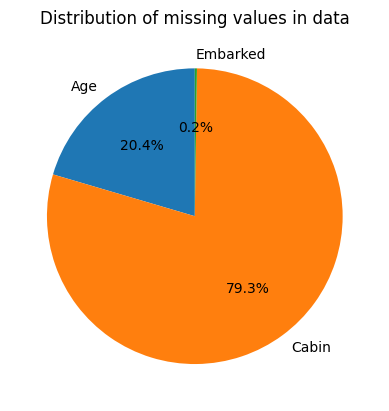

In [582]:
features_with_na[features_with_na > 1].plot(kind='pie', startangle=90, autopct='%1.1f%%', title='Distribution of missing values in data')

The Missing Values are from Cabin,Age & Embarked


1.   Use some Centeral Tendency to impute data into Age. Chose Median becuase its more robust than mean


In [583]:
avg_age = math.ceil(df['Age'].mean())
avg_age = math.ceil(df['Age'].median())

df['Age'].fillna(avg_age,inplace=True)

<Axes: xlabel='PassengerId', ylabel='Cabin'>

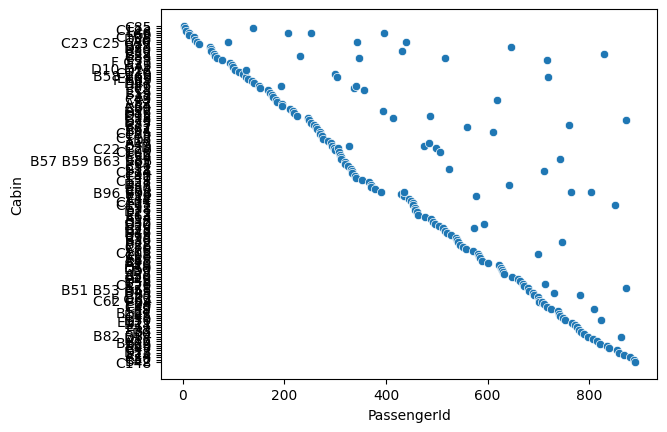

In [584]:
sns.scatterplot(data=df,x="PassengerId",y="Cabin")

<Axes: xlabel='PassengerId', ylabel='Cabin'>

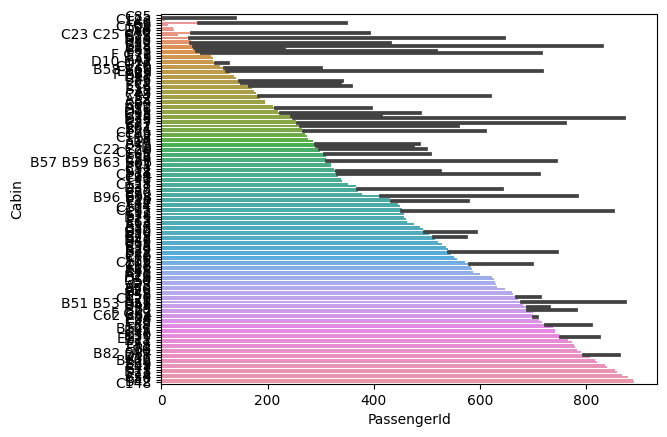

In [585]:
sns.barplot(data=df,x="PassengerId",y="Cabin")

This shows that many passengers have mulitple cabins, and that there are too much noise in cabin, therefore its better to drop this data all together

In [586]:
df = df.drop(columns=['Cabin','Ticket'])

In [587]:
print(df['Embarked'].unique())
df['Embarked'].fillna('S',inplace=True)

['S' 'C' 'Q' nan]


This was done because from the earlier observation in Categorical Variables you can see that most of the people who survived were from S. This technique is called Most Frequent (Values) Imputation and works well with cateogrical data. **MEAN/MEDIAN SHOULD NEVER BE USED WITH CATEGORICAL DATA**

In [588]:
features_with_na = df.isnull().sum()
features_with_na

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Managing Outliers

Text(0.5, 0.98, 'Boxplots of all numerical features')

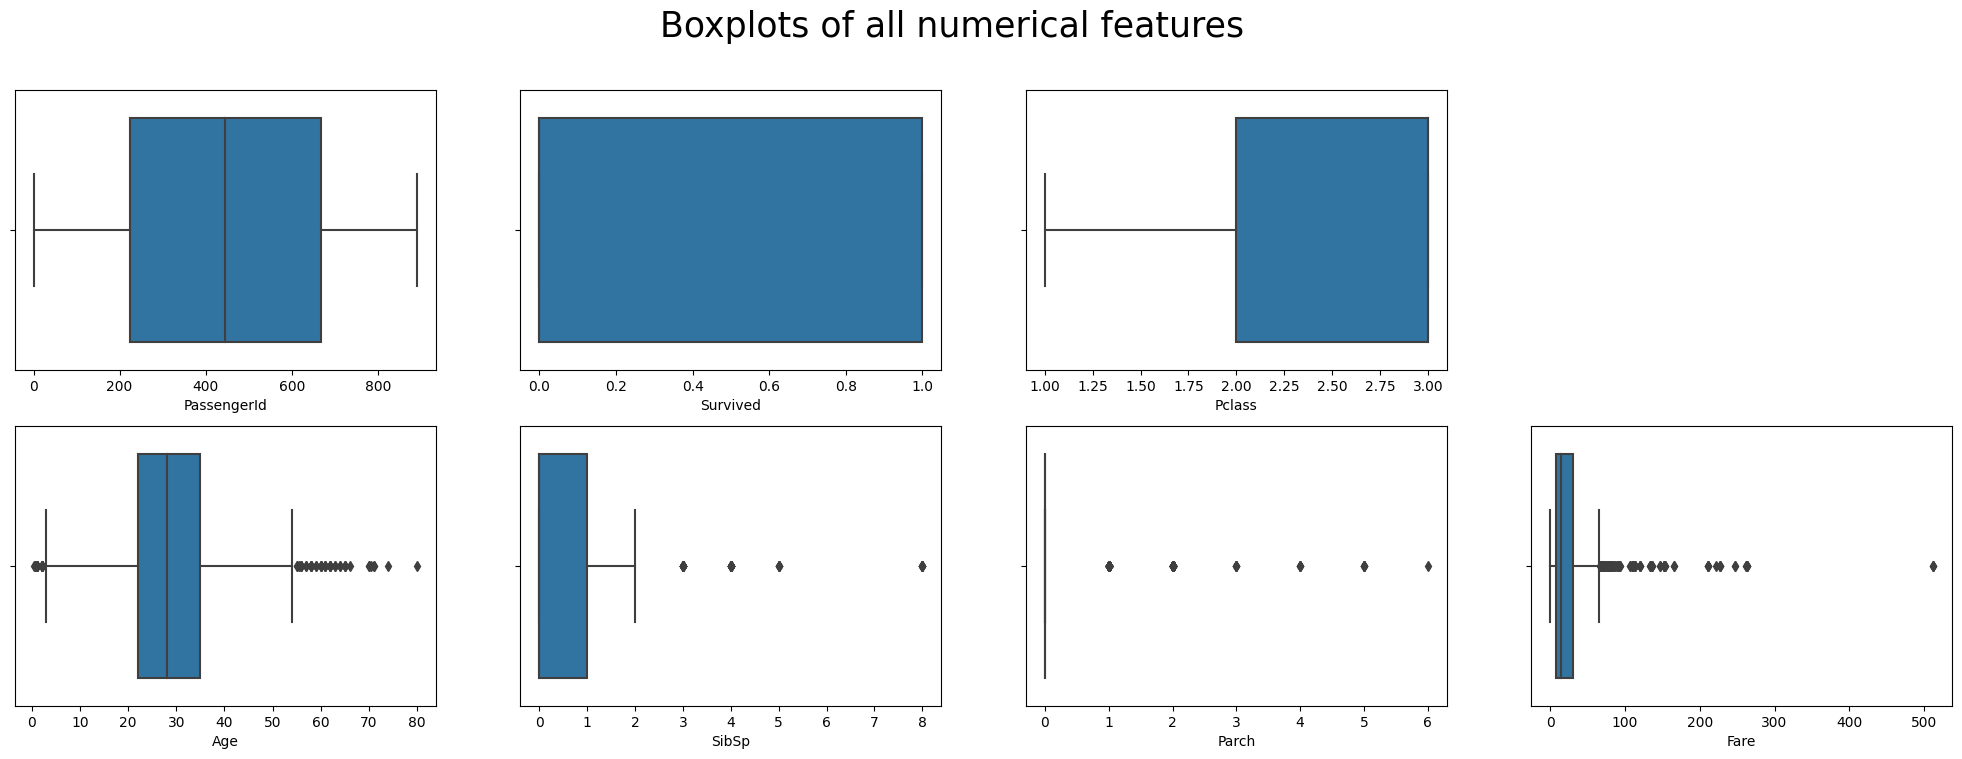

In [598]:
fig, axes = plt.subplots(2, 4, figsize=(25, 8))
fig.delaxes(axes[0, 3])

sns.boxplot(data=df, x='PassengerId', ax=axes[0,0])
sns.boxplot(data=df, x='Survived', ax=axes[0,1])
sns.boxplot(data=df, x='Pclass', ax=axes[0,2])
sns.boxplot(data=df, x='Age', ax=axes[1,0])
sns.boxplot(data=df, x='SibSp', ax=axes[1,1])
sns.boxplot(data=df, x='Parch', ax=axes[1,2])
sns.boxplot(data=df, x='Fare', ax=axes[1,3])

plt.suptitle('Boxplots of all numerical features', fontsize=25)

Text(0.5, 0.98, 'Scatter Plots between various pairs of numerical features')

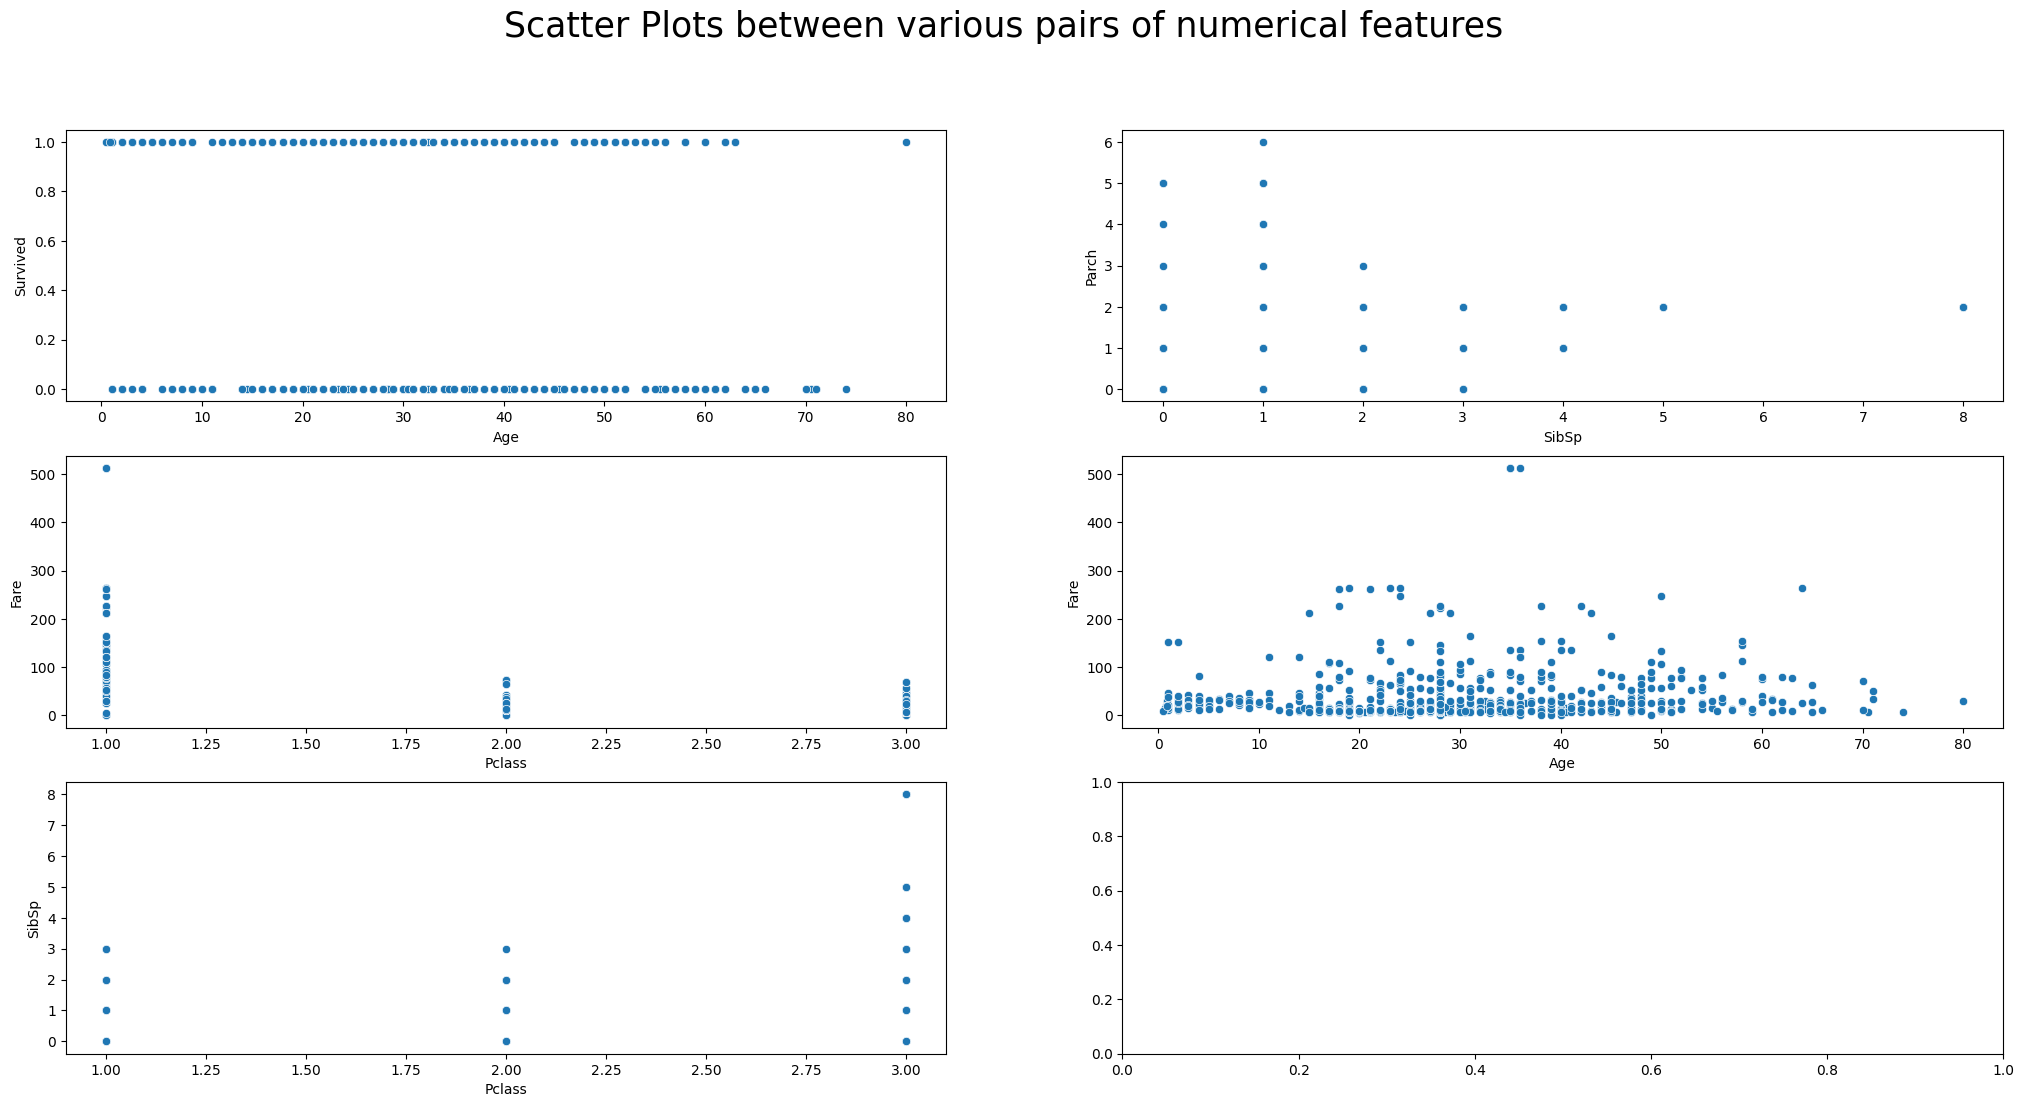

In [601]:
fig, axes = plt.subplots(3, 2, figsize=(25, 12))
sns.scatterplot(data=df, x='Age', y='Survived', ax=axes[0,0])
sns.scatterplot(data=df, x='SibSp', y='Parch', ax=axes[0,1])
sns.scatterplot(data=df, x='Pclass', y='Fare', ax=axes[1,0])
sns.scatterplot(data=df, y='Fare', x='Age', ax=axes[1,1])
sns.scatterplot(data=df,x='Pclass',y='SibSp',ax=axes[2,0])
plt.suptitle('Scatter Plots between various pairs of numerical features', fontsize=25)


*   There are some outliers which includes the people having >3 and people who are above 55.

*   There are also some outliers in Fare, this is because Passenger Class 1 refers to the rich class therefore they had to pay more. The price difference is significant and maybe log transformation could be applied.
*   There is no relation with Age and Fare which suggests that children were not given free tickets. Nor did they had any discounts
*   Age with Survival shows that more children and extremely old people were saved first.
*   Siblings less than 4 suggests that maybe there were families which were had their cousins.
*   Similarly there are some outliers in Siblings with more than 3. This could suggest that there are large families.
*   Similarly there are some outliers in Parent&Child with more than 0

According to my analysis I think though they might look like outliers but they might have dependencies on each other and if my claims are true then its best not to remove these outliers


#Grouping & Aggregation

In [590]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


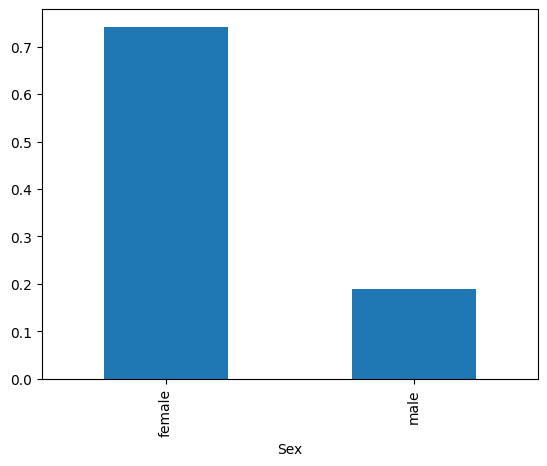

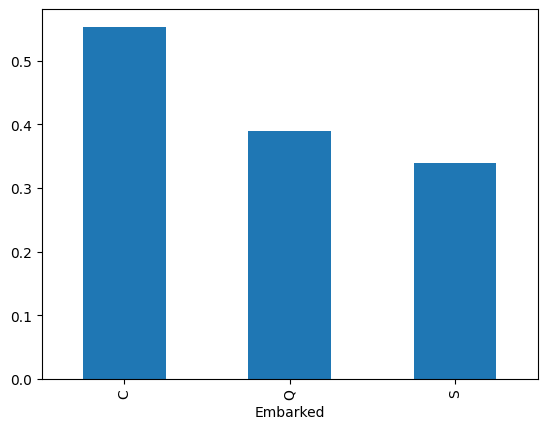

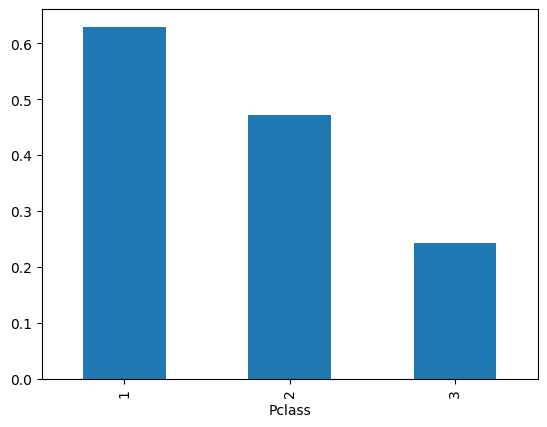

In [595]:
analysis = ['Sex','Embarked','Pclass']
for feature in analysis:
  df.groupby(feature)['Survived'].mean().plot.bar()
  plt.show()

This confirms my previous claims that more females survived and people who embarked from Cherbourg. Moreover this also shows are very important analysis that more people from Pclass 1 survived which summarises that:

**Women, First Class People,People from Cherbourg were Rescued First**

#Data Distribution Analysis:

In [538]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [539]:
import pandas as pd
from scipy.stats import kurtosis, skew

# Calculate kurtosis and skewness for each feature
numerical_features = df.select_dtypes(include=['int64','float64'])

# Calculate kurtosis and skewness for each feature
kurtosis_values = numerical_features.apply(kurtosis)
skewness_values = numerical_features.apply(skew)

# Categorize kurtosis types
kurtosis_types = ['Mesokurtic' if kurtosis_val == 3
                  else 'Leptokurtic' if kurtosis_val > 3
                  else 'Platykurtic'
                  for kurtosis_val in kurtosis_values]

# Create a DataFrame to store the results
statistics_df = pd.DataFrame({
    'Feature': numerical_features.columns,
    'Kurtosis': kurtosis_values,
    'Skewness': skewness_values,
    'Kurtosis Type': kurtosis_types
})

print(statistics_df)

                 Feature   Kurtosis  Skewness Kurtosis Type
PassengerId  PassengerId  -1.200003  0.000000   Platykurtic
Survived        Survived  -1.771786  0.477717   Platykurtic
Pclass            Pclass  -1.279570 -0.629486   Platykurtic
Age                  Age   0.981576  0.509385   Platykurtic
SibSp              SibSp  17.773512  3.689128   Leptokurtic
Parch              Parch   9.716613  2.744487   Leptokurtic
Fare                Fare  33.204289  4.779253   Leptokurtic


Text(0.5, 0.98, 'Histograms & Density Plots For Numerical Data')

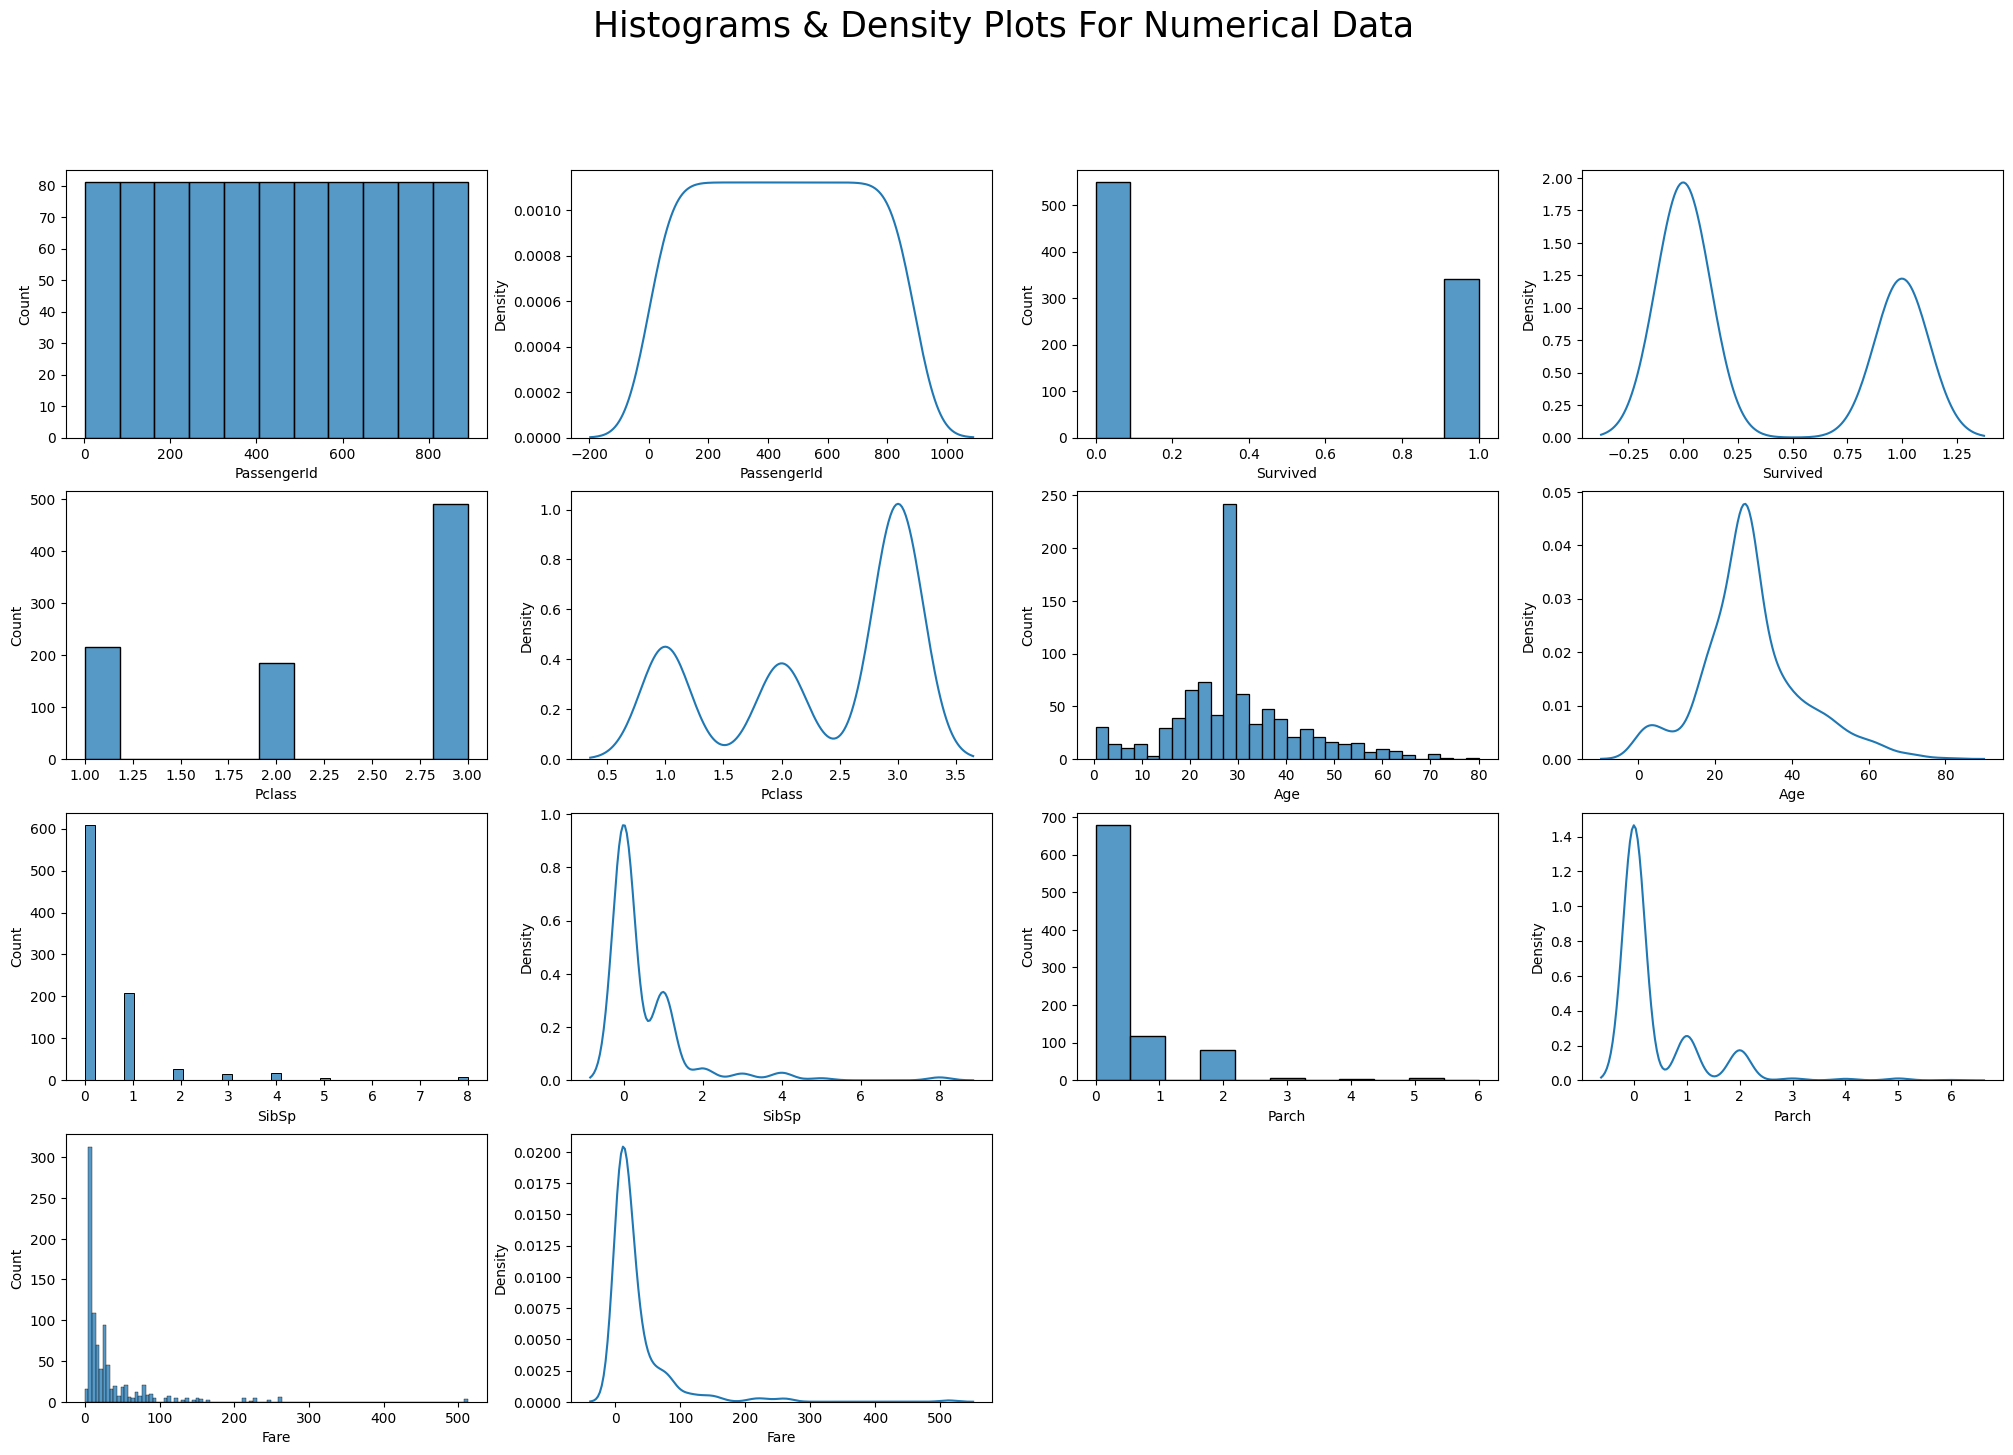

In [540]:
#plt.subplots(rows,cols, Total figsize)
fig, axes = plt.subplots(4, 4,figsize=(25,16))

fig.delaxes(axes[3,2])
fig.delaxes(axes[3,3])

sns.histplot(numerical_features['PassengerId'],ax=axes[0,0])
sns.kdeplot(numerical_features['PassengerId'],ax=axes[0,1])

sns.histplot(numerical_features['Survived'],ax=axes[0,2])
sns.kdeplot(numerical_features['Survived'],ax=axes[0,3])

sns.histplot(numerical_features['Pclass'],ax=axes[1,0])
sns.kdeplot(numerical_features['Pclass'],ax=axes[1,1])

sns.histplot(numerical_features['Age'],ax=axes[1,2])
sns.kdeplot(numerical_features['Age'],ax=axes[1,3])

sns.histplot(numerical_features['SibSp'],ax=axes[2,0])
sns.kdeplot(numerical_features['SibSp'],ax=axes[2,1])

sns.histplot(numerical_features['Parch'],ax=axes[2,2])
sns.kdeplot(numerical_features['Parch'],ax=axes[2,3])

sns.histplot(numerical_features['Fare'],ax=axes[3,0])
sns.kdeplot(numerical_features['Fare'],ax=axes[3,1])

plt.suptitle('Histograms & Density Plots For Numerical Data', fontsize=25)


Need to clarify on this because for example the value of Skewnees for Fare is +ve but it is showing Left Skewed in the diagram.

From Earlier I would go with the conclusions with the diagram and ignore the ones that I got from scipy

# Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

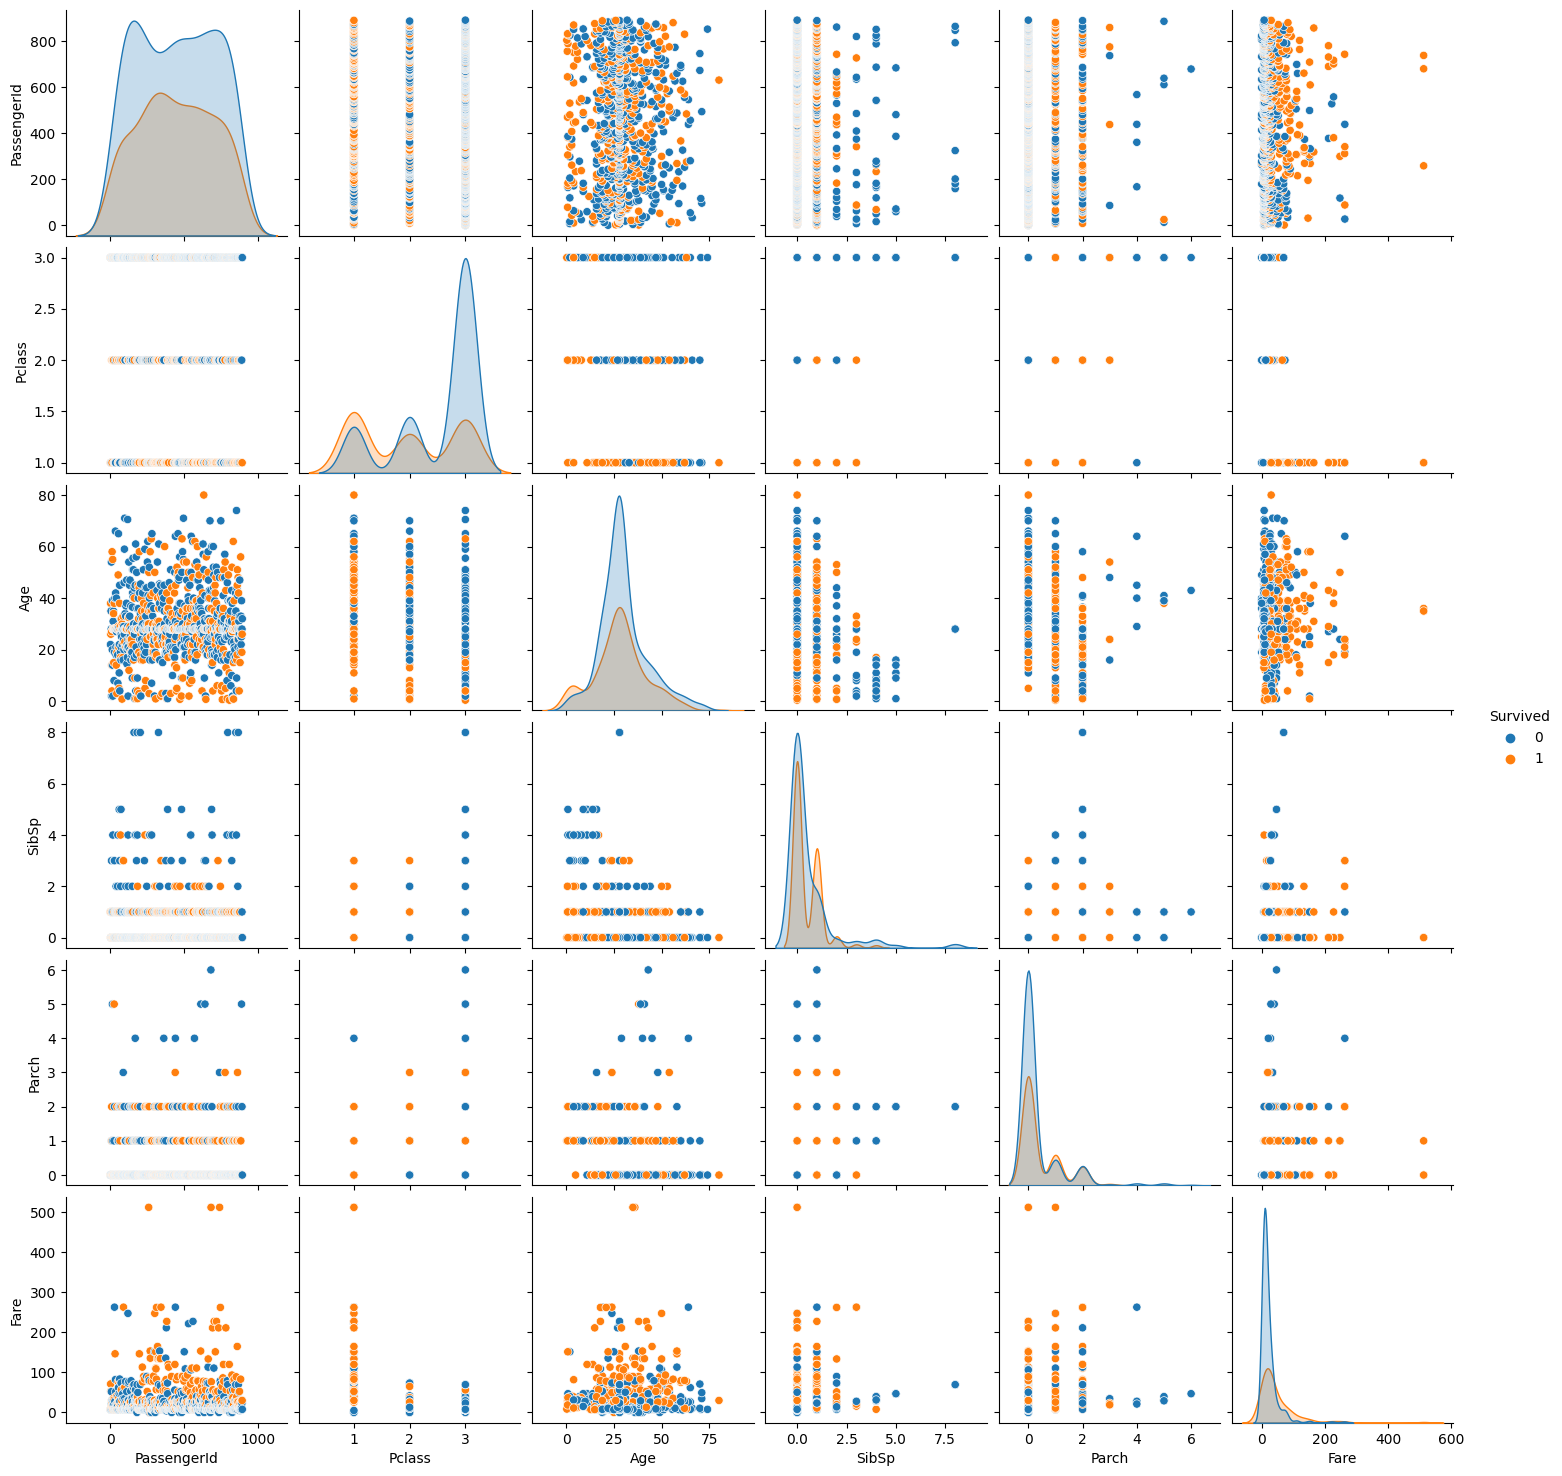

In [541]:
fig = plt.figure(figsize=(20, 20))
sns.pairplot(data=df, hue='Survived')

<Axes: >

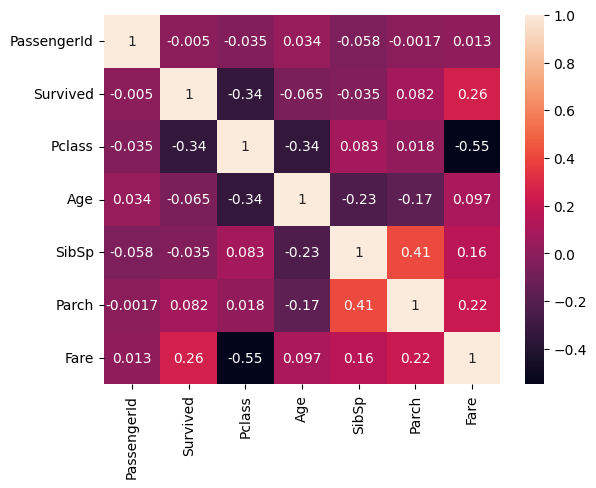

In [542]:
sns.heatmap(df.corr(numeric_only=True), annot=df.corr(numeric_only=True))

More people from first class survived deduced from pairplot. It also shows that some of the people of age 0-3 and very old people like 80 survived which meant children and old men first. There isnt much useful information from the heatmap

# Data Transformation

In [543]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


As you can see we still got some categorical data. Lets One-Hot Encode them

In [544]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [545]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [554]:
df['Log_Fare'] = np.log(df['Fare'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [555]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Log_Fare
0,1,0,3,0,22.0,1,0,7.2500,0,1.981001
1,2,1,1,1,38.0,1,0,71.2833,1,4.266662
2,3,1,3,1,26.0,0,0,7.9250,0,2.070022
3,4,1,1,1,35.0,1,0,53.1000,0,3.972177
4,5,0,3,0,35.0,0,0,8.0500,0,2.085672


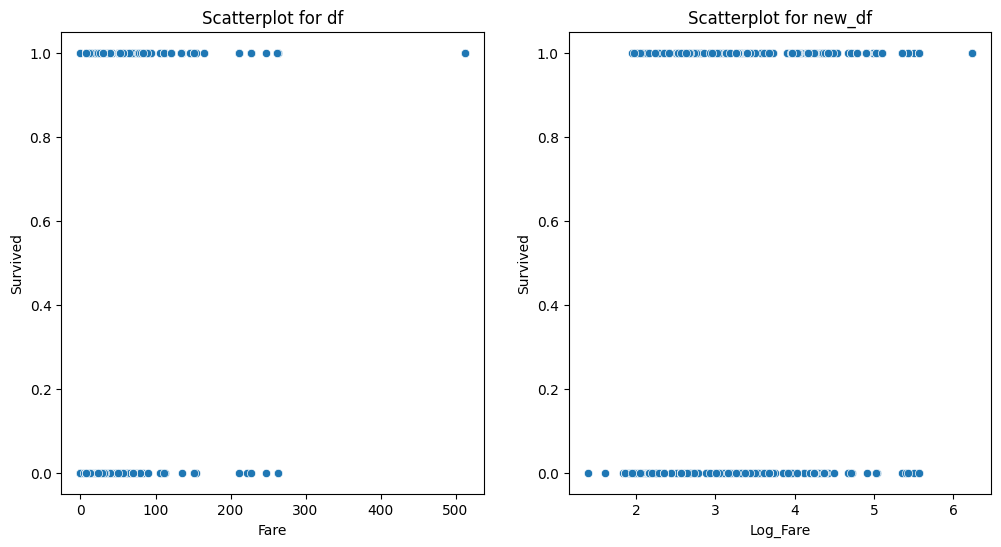

In [558]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=df, x='Fare', y='Survived', ax=axes[0])
sns.scatterplot(data=df, x='Log_Fare', y='Survived', ax=axes[1])

# Add titles or other customizations if needed
axes[0].set_title('Scatterplot for df')
axes[1].set_title('Scatterplot for new_df')

plt.show()


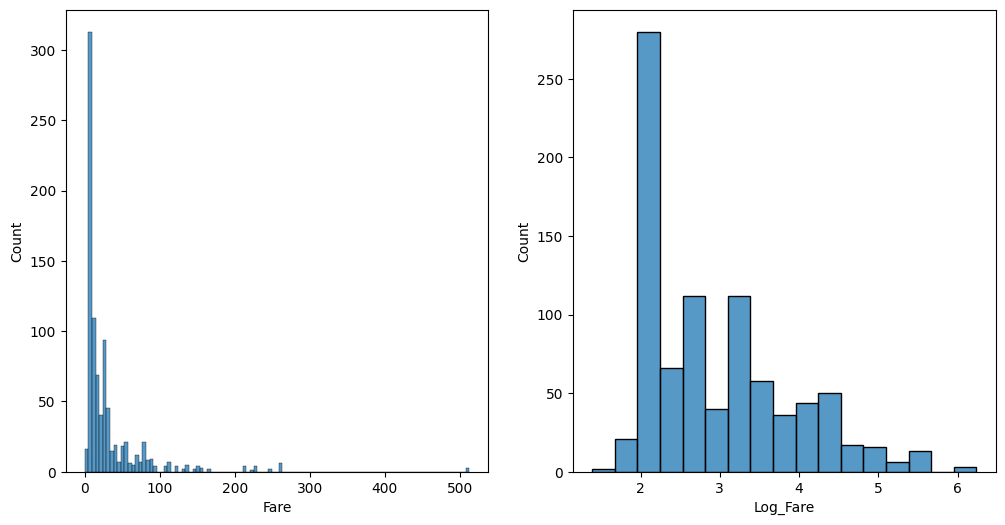

In [559]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df['Fare'], ax=axes[0])
sns.histplot(data=df['Log_Fare'], ax=axes[1])
plt.show()

As you can see log transformation is making the data more scatter in the scatterplot, whereas the skewness remains unchanged in the hist plot and therefore it is not applicable over here.